In [1]:

import matplotlib.pyplot as plt
import cv2 as cv
from skimage import color, io
import numpy as np

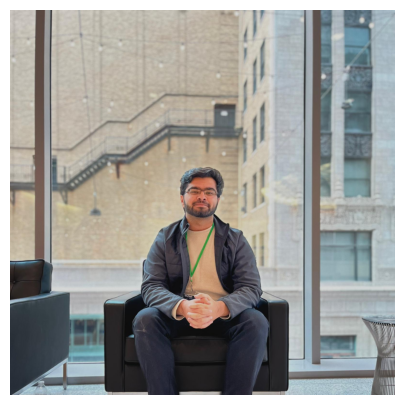

In [2]:
def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def my_display(img):
    # Show image
    plt.figure(figsize = (5,5))
    img = plt.imread(img)
    #cv.imshow('img',img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


img_path = 'test_image.jpg'
my_display(img_path)

# loading image

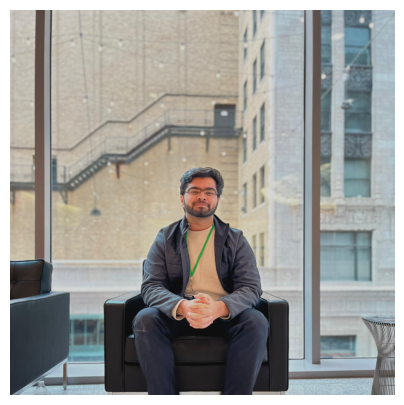

In [3]:
out = io.imread(img_path)
out = out.astype(np.float64) / 255
display(out)

## dimming image

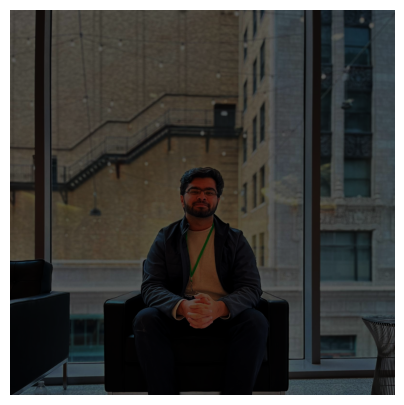

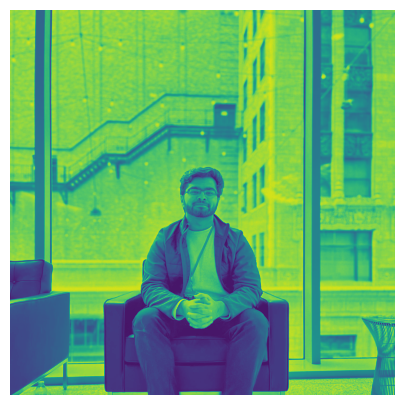

In [4]:
dimIMG = 0.5 * out ** 2
grayImg = color.rgb2gray(out)

display(dimIMG)
display(grayImg)


### with cv2

In [13]:
cvImg = cv.imread(img_path)
grayImg2 = cv.cvtColor(cvImg, cv.COLOR_BGR2GRAY)
#grayImg2 = color.rgb2gray(cvImg)
grayImg2 = cv.resize(grayImg2,(1000,1000))
cv.imshow('gray scale img',grayImg2)
cv.waitKey(0)  
cv.destroyAllWindows()

### Showing L.A.B Channels

original


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


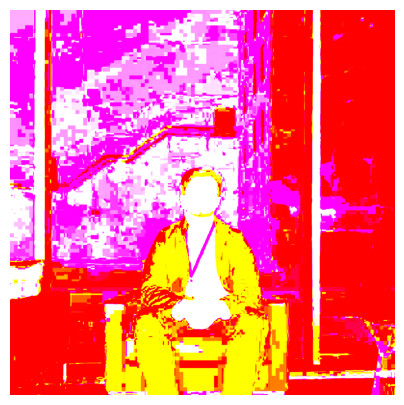

L Channel


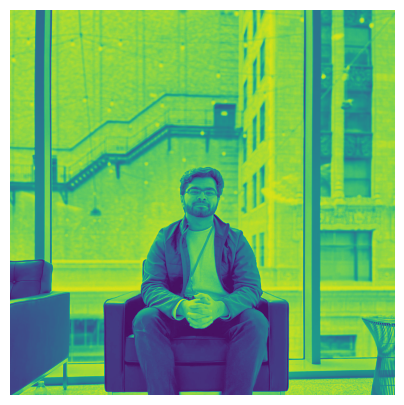

A Channel


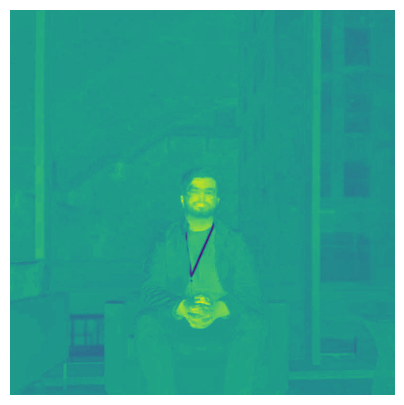

B Channel


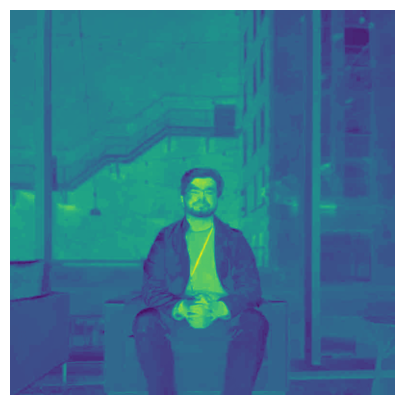

In [6]:
print('original')
lab = color.rgb2lab(out)
display(lab)

print('L Channel')
display(lab[:, :, 0]) # L channel
print('A Channel')
display(lab[:, :, 1]) # A channel
print('B Channel')
display(lab[:, :, 2]) # B Channel
#i dont know why it shows as green?

h


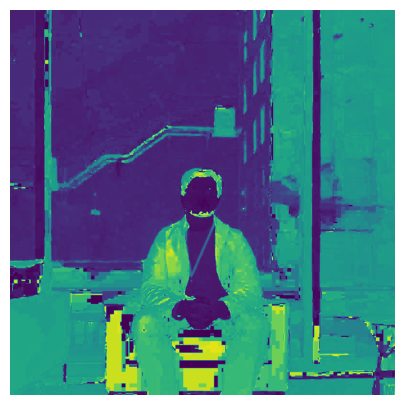

s


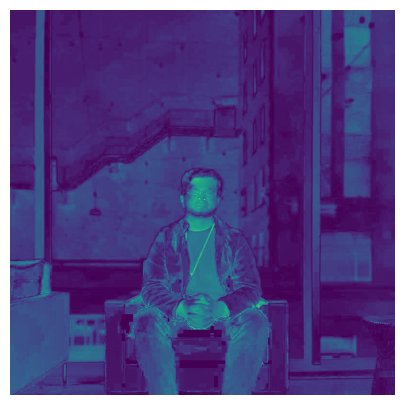

v


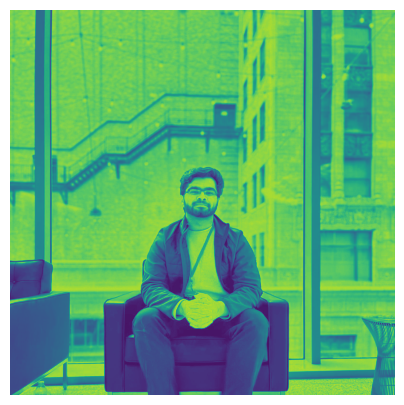

In [7]:
hsv = color.rgb2hsv(out)
print('h')
display(hsv[:,:,0])
print('s')
display(hsv[:,:,1])
print('v')
display(hsv[:,:,2])

## Image splitting

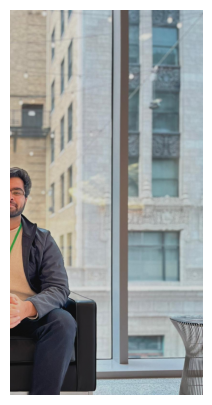

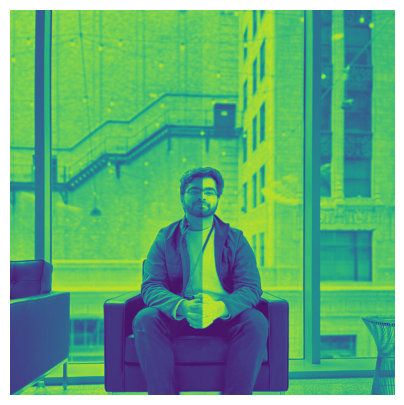

In [8]:
display(out[:,out.shape[1] // 2:,:])
splitout = out
splitout = out[:,:,0]
splitout2 = out[:,:,1]
splitout[:,:splitout.shape[1] // 2] = splitout2[:,:splitout2.shape[1] // 2]
display(splitout)


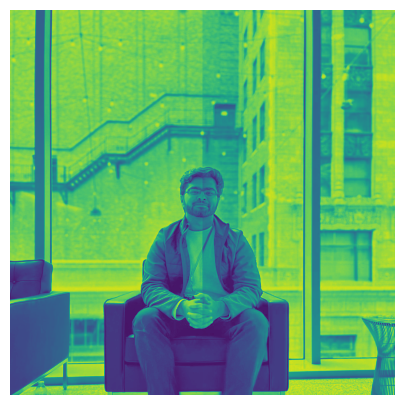

In [9]:
#quadrants
outFin = out.copy()
splitoutFinal = outFin[:,:,-1]
splitout = outFin[:,:,0]
splitout2 = outFin[:,:,1]
splitout3 = outFin[:,:,2]
splitoutFinal[:splitout2.shape[0],:splitout.shape[1] // 2] = splitoutFinal[:splitout2.shape[0],:splitout2.shape[1] // 2]
splitoutFinal[:splitout2.shape[0],:splitout.shape[1] // 2] = splitout[:splitout2.shape[0],:splitout2.shape[1] // 2]
splitoutFinal[splitout2.shape[0]:,splitout.shape[1] // 2:] = splitout2[splitout2.shape[0]:,splitout2.shape[1] // 2:]
splitoutFinal[splitout2.shape[0]:,splitout.shape[1] // 2:] = splitout3[splitout2.shape[0]:,splitout2.shape[1] // 2:]
display(splitoutFinal)